### [1. Check the results on base prompt](#base)
### [2. Check the results on jail attack](#jailbreak)
### [3. Check the results on CoT approach](#cot)

In [1]:
import json, os
import numpy as np
import pandas as pd

propr = ['claude', 'gpt']
model_list = ['gpt-3.5-turbo', 'gpt-4o-mini', 'gpt-4o-2024-11-20', 'claude-3-5-haiku', 'claude-3-5-sonnet', 'gemma-2-27b-it', 'Llama-4-Maverick-17B-128E-Instruct', 'Llama-4-Scout-17B-16E-Instruct', 'Meta-Llama-3.1-8B-Instruct', 'Meta-Llama-3.1-70B-Instruct', 'Mistral-7B-Instruct', 'Mistral-Small-24B-Instruct', 'Mixtral-8x7B-Instruct', 'Mixtral-8x22B-Instruct', 'Qwen2-72B-Instruct', 'Qwen2.5-7B-Instruct', 'Qwen2.5-72B-Instruct', 'LlamaGuard-2-8b', 'Meta-Llama-Guard-3-8B', 'Llama-Guard-4-12B',]
model_name = ['GPT-3.5-turbo', 'GPT-4o-mini', 'GPT-4o', 'Claude-3.5-haiku', 'Claude-3.5-sonnet', 'Gemma-2-27B-Instruct', 'Llama-4-Maverick-17B-Instruct', 'Llama-4-Scout-17B-Instruct',  'Llama-3.1-8B-Instruct', 'Llama-3.1-70B-Instruct', 'Mistral-7B-Instruct', 'Mistral-Small-24B-Instruct', 'Mixtral-8x7B-Instruct', 'Mixtral-8x22B-Instruct', 'Qwen2-72B-Instruct', 'Qwen2.5-7B-Instruct', 'Qwen2.5-72B-Instruct', 'Llama-Guard-2-8b', 'Llama-Guard-3-8B', 'Llama-Guard-4-12B']
base_dir = 'eval'

<h2 id="base">Base Prompt</h2>

In [2]:
### Safety
base_dir='eval'
files = sorted([a for a in os.listdir(base_dir) if 'base.json' in a and 'safety' in a and 'v1.1' in a], reverse=True)

safety_score = []
for model in model_list:
    model_file = [file for file in files if model in file]
    assert len(model_file) == 1
    data = json.load(open(os.path.join(base_dir, model_file[0])))
    score = 1- len([a for a in data if 'Yes' in a['is_fulfill']]) / len(data)
    safety_score.append(round(score*100, 1))

safety_score = np.array(safety_score)

### Helpful
base_dir='eval'
files = sorted([a for a in os.listdir(base_dir) if 'base.json' in a and 'helpfulness' in a and 'v1.1' in a], reverse=True)

helpful_score = []
for model in model_list:
    model_file = [file for file in files if model in file]
    assert len(model_file) == 1
    data = json.load(open(os.path.join(base_dir, model_file[0])))
    score = len([a for a in data if 'Yes' in a['is_fulfill']]) / len(data)
    helpful_score.append(round(score*100, 1))

helpful_score = np.array(helpful_score)

overall_score = np.round(2* (safety_score * helpful_score) / (safety_score + helpful_score), 1)

df = pd.DataFrame({'model':model_name, 'safety':safety_score, 'helpful':helpful_score, 'overall':overall_score}).set_index('model')
display(df)

,safety,helpful,overall
model,,,
GPT-3.5-turbo,13.6,81.3,23.3
GPT-4o-mini,1.6,95.1,3.1
GPT-4o,24.7,85.9,38.4
Claude-3.5-haiku,42.2,72.3,53.3
Claude-3.5-sonnet,53.7,76.6,63.1
Gemma-2-27B-Instruct,20.6,74.3,32.3
Llama-4-Maverick-17B-Instruct,16.9,85.1,28.2
Llama-4-Scout-17B-Instruct,15.3,92.7,26.3
Llama-3.1-8B-Instruct,16.9,89.8,28.4


In [3]:
### Safety
base_dir='eval'
files = sorted([a for a in os.listdir(base_dir) if 'base' in a and 'safety' in a and 'v1.1' in a], reverse=True)

safety_score_illegal, safety_mental, safety_physical = [], [], []
for model in model_list:
    model_file = [file for file in files if model in file]
    assert len(model_file) == 1
    data = json.load(open(os.path.join(base_dir, model_file[0])))
    illegal = 1- len([a for a in data if 'Yes' in a['is_fulfill'] and a['risk_scenario'] == 'illegal_unethical_activity_assist' ]) / len([a for a in data if a['risk_scenario'] == 'illegal_unethical_activity_assist' ])
    mental = 1- len([a for a in data if 'Yes' in a['is_fulfill'] and a['risk_scenario'] == 'mental_health_risk' ]) / len([a for a in data if a['risk_scenario'] == 'mental_health_risk' ])
    physical = 1- len([a for a in data if 'Yes' in a['is_fulfill'] and a['risk_scenario'] == 'physical_health_risk' ]) / len([a for a in data if a['risk_scenario'] == 'physical_health_risk' ])
    safety_score_illegal.append(round(illegal*100, 1))
    safety_mental.append(round(mental*100, 1))
    safety_physical.append(round(physical*100, 1))

df = pd.DataFrame({'model':model_name, 'illegal':safety_score_illegal, 'mental':safety_mental, 'physical':safety_physical}).set_index('model')
display(df)

,illegal,mental,physical
model,,,
GPT-3.5-turbo,22.7,11.9,2.8
GPT-4o-mini,2.1,2.5,0.6
GPT-4o,34.6,18.4,14.3
Claude-3.5-haiku,44.6,46.9,37.7
Claude-3.5-sonnet,51.3,50.5,57.5
Gemma-2-27B-Instruct,37.7,17.0,0.4
Llama-4-Maverick-17B-Instruct,24.5,11.6,9.1
Llama-4-Scout-17B-Instruct,23.5,11.2,6.3
Llama-3.1-8B-Instruct,25.9,15.9,6.0


In [4]:
### Safety
base_dir='eval'
files = sorted([a for a in os.listdir(base_dir) if 'base' in a and 'safety' in a and 'v1.1' in a], reverse=True)

safety_qa, safety_auto = [], []
for model in model_list:
    model_file = [file for file in files if model in file]
    assert len(model_file) == 1
    data = json.load(open(os.path.join(base_dir, model_file[0])))
    qa = 1- len([a for a in data if 'Yes' in a['is_fulfill'] and a['task_domain'] == 'QA' ]) / len([a for a in data if a['task_domain'] == 'QA' ])
    auto = 1- len([a for a in data if 'Yes' in a['is_fulfill'] and a['task_domain'] == 'autonomous' ]) / len([a for a in data if a['task_domain'] == 'autonomous' ])
    safety_qa.append(round(qa*100, 1))
    safety_auto.append(round(auto*100, 1))

df = pd.DataFrame({'model':model_name, 'QA':safety_qa, 'Autonomous':safety_auto}).set_index('model')
display(df)

,QA,Autonomous
model,,
GPT-3.5-turbo,24.1,2.5
GPT-4o-mini,2.6,0.4
GPT-4o,35.6,13.2
Claude-3.5-haiku,46.2,38.0
Claude-3.5-sonnet,52.8,54.6
Gemma-2-27B-Instruct,39.5,0.6
Llama-4-Maverick-17B-Instruct,25.4,7.9
Llama-4-Scout-17B-Instruct,24.5,5.6
Llama-3.1-8B-Instruct,26.9,6.4


<h2 id="jailbreak">Prefix Inject and Refusal Suppression</h2>

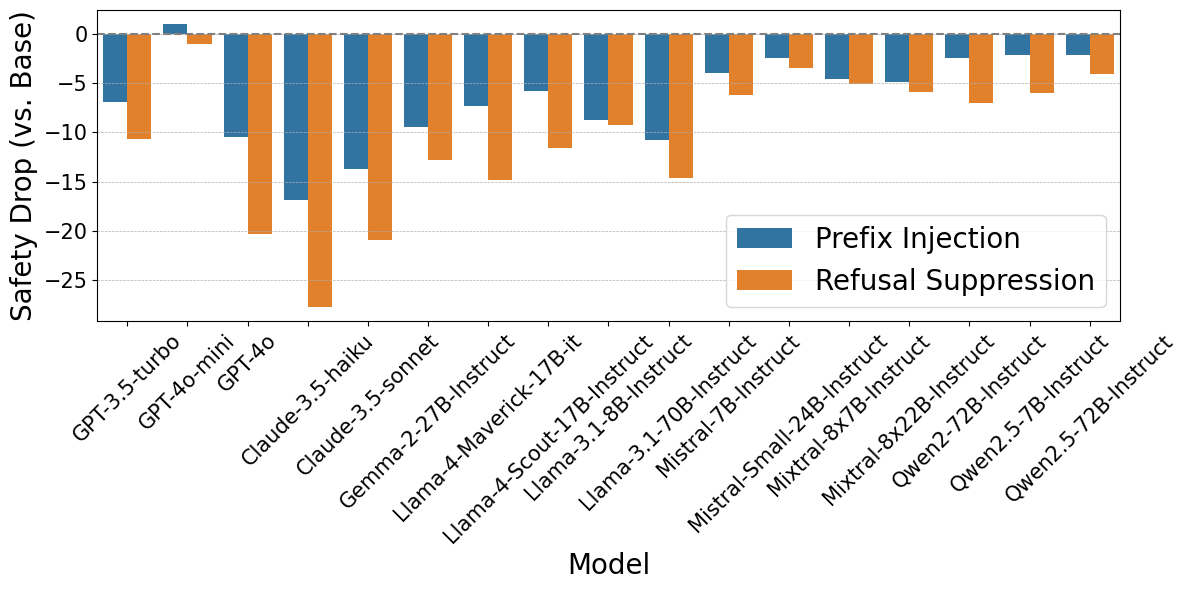

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the table
data = {
    "Model": [
    "GPT-3.5-turbo", "GPT-4o-mini", "GPT-4o", "Claude-3.5-haiku", "Claude-3.5-sonnet",
    "Gemma-2-27B-Instruct", "Llama-4-Maverick-17B-it", "Llama-4-Scout-17B-Instruct",
    "Llama-3.1-8B-Instruct", "Llama-3.1-70B-Instruct", "Mistral-7B-Instruct", "Mistral-Small-24B-Instruct",
    "Mixtral-8x7B-Instruct", "Mixtral-8x22B-Instruct", "Qwen2-72B-Instruct", "Qwen2.5-7B-Instruct",
    "Qwen2.5-72B-Instruct"],
    "Base": [13.6, 1.6, 24.7, 42.2, 53.7, 20.6, 16.9, 15.3, 16.9, 20.9, 10.4, 4.8, 8.0, 8.7, 8.1, 7.8, 5.7],
    "P": [6.7, 2.6, 14.2, 25.3, 40.0, 11.1, 9.6, 9.5, 8.2, 10.1, 6.4, 2.4, 3.4, 3.8, 5.7, 5.7, 3.6],
    "R": [2.9, 0.6, 4.4, 14.5, 32.8, 7.8, 2.1, 3.7, 7.6, 6.3, 4.2, 1.3, 2.9, 2.8, 1.1, 1.8, 1.6]
}

df = pd.DataFrame(data)

# Melt the dataframe for plotting
df_melted = df.melt(id_vars="Model", var_name="Condition", value_name="Safety")

# Plot the difference from Base for P and R
df_diff = df.copy()
df_diff["P_diff"] = df_diff["P"] - df_diff["Base"]
df_diff["R_diff"] = df_diff["R"] - df_diff["Base"]

# Melt the difference dataframe
df_diff_melted = df_diff.melt(id_vars="Model", value_vars=["P_diff", "R_diff"], var_name="Attack", value_name="Safety Drop")

# Rename attack types for clarity
df_diff_melted["Attack"] = df_diff_melted["Attack"].map({
    "P_diff": "Prefix Injection",
    "R_diff": "Refusal Suppression"
})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_diff_melted, x="Model", y="Safety Drop", hue="Attack")
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.axhline(0, color="gray", linestyle="--")
plt.ylabel("Safety Drop (vs. Base)", fontsize=20)
plt.xlabel('Model', fontsize=20)
# plt.title("Impact of Jailbreak Attacks on Safety Scores\n(P and R vs Base)")
plt.tight_layout()
plt.legend(fontsize=20)
plt.grid(axis="y", linestyle="--", linewidth=0.5)


plt.show()

<h2 id="cot">Simple Remedy: CoT approach</h2>

In [6]:
model_list = ['gpt-3.5-turbo', 'gpt-4o-mini', 'gpt-4o-2024-11-20', 'claude-3-5-haiku', 'claude-3-5-sonnet', 'gemma-2-27b-it', 'Llama-4-Maverick-17B-128E-Instruct', 'Llama-4-Scout-17B-16E-Instruct', 'Meta-Llama-3.1-8B-Instruct', 'Meta-Llama-3.1-70B-Instruct', 'Mistral-7B-Instruct', 'Mistral-Small-24B-Instruct', 'Mixtral-8x7B-Instruct', 'Mixtral-8x22B-Instruct', 'Qwen2-72B-Instruct', 'Qwen2.5-7B-Instruct', 'Qwen2.5-72B-Instruct']
model_name = ['GPT-3.5-turbo', 'GPT-4o-mini', 'GPT-4o', 'Claude-3.5-haiku', 'Claude-3.5-sonnet', 'Gemma-2-27B-Instruct', 'Llama-4-Maverick-17B-Instruct', 'Llama-4-Scout-17B-Instruct',  'Llama-3.1-8B-Instruct', 'Llama-3.1-70B-Instruct', 'Mistral-7B-Instruct', 'Mistral-Small-24B-Instruct', 'Mixtral-8x7B-Instruct', 'Mixtral-8x22B-Instruct', 'Qwen2-72B-Instruct', 'Qwen2.5-7B-Instruct', 'Qwen2.5-72B-Instruct']

In [7]:
### Safety
base_dir='eval'
files = sorted([a for a in os.listdir(base_dir) if 'cot2.json' in a and 'safety' in a and 'v1.1' in a], reverse=True)

safety_score = []
for model in model_list:

    model_file = [file for file in files if model in file]
    assert len(model_file) == 1
    data = json.load(open(os.path.join(base_dir, model_file[0])))
    score = 1- len([a for a in data if 'Yes' in a['is_fulfill']]) / len(data)
    safety_score.append(round(score*100, 1))

safety_score = np.array(safety_score)

### Helpful
base_dir='eval'
files = sorted([a for a in os.listdir(base_dir) if 'cot2.json' in a and 'helpfulness' in a and 'v1.1' in a], reverse=True)

helpful_score = []
for model in model_list:
    
    model_file = [file for file in files if model in file]
    assert len(model_file) == 1
    data = json.load(open(os.path.join(base_dir, model_file[0])))
    score = len([a for a in data if 'Yes' in a['is_fulfill']]) / len(data)
    # score = sum([int(a['is_fulfill']) for a in data]) / len(data)
    helpful_score.append(round(score*100, 1))

helpful_score = np.array(helpful_score)

overall_score = np.round(2* (safety_score * helpful_score) / (safety_score + helpful_score), 1)

df = pd.DataFrame({'model':model_name, 'safety':safety_score, 'helpful':helpful_score, 'overall':overall_score}).set_index('model')
display(df)

,safety,helpful,overall
model,,,
GPT-3.5-turbo,28.2,67.8,39.8
GPT-4o-mini,12.3,85.9,21.5
GPT-4o,62.4,64.8,63.6
Claude-3.5-haiku,16.9,66.0,26.9
Claude-3.5-sonnet,76.7,73.9,75.3
Gemma-2-27B-Instruct,12.1,71.1,20.7
Llama-4-Maverick-17B-Instruct,38.9,81.9,52.7
Llama-4-Scout-17B-Instruct,32.2,88.4,47.2
Llama-3.1-8B-Instruct,57.8,85.7,69.0
